In [6]:
import librosa
import numpy as np

y, sr = librosa.core.load('../files/moonlight-sonata-piano-sonata-no.14-in-c-sharp-minor-op.27-no.2-beethoven-by-new-hansen.ogg')

C:\Users\tma8\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [413]:
# Useful reference:
# https://kevinsprojects.wordpress.com/2014/12/13/short-time-fourier-transform-using-python-and-numpy/
# https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520
# librosa stft src code: https://github.com/librosa/librosa/blob/main/librosa/core/spectrum.py

In [20]:
n_fft = 1024
hop_length = 512

spec = np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))
freqs = librosa.core.fft_frequencies(n_fft=n_fft)
times = librosa.core.frames_to_time(spec[0], sr=sr, n_fft=n_fft, hop_length=hop_length)

print('spectrogram size', spec.shape)

fft_bin = 14
time_idx = 1000

print('freq (Hz)', freqs[fft_bin])
print('time (s)', times[time_idx])
print('amplitude', spec[fft_bin, time_idx])

spectrogram size (5001, 15162)
freq (Hz) 30.87
time (s) 0.2365532879818594
amplitude 0.36730176


In [13]:
import matplotlib.pyplot as plt

In [28]:
def spectrogram(samples, sample_rate, stride_ms = 25.0, 
                          window_ms = 50.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)
    print(window_size)
    max_freq = int(sample_rate/2)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    total_seg = (len(samples) - window_size) // stride_size + 1
    nshape = (window_size, total_seg)
    print(total_seg)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    inner_pad = np.zeros(window_size)
    specgram = np.empty(nshape, dtype=np.float32) 
    
    for i in range(total_seg):
        window = windows[:, i]
        window_smooth = window * weighting[:,0]
        padded = np.append(window_smooth, inner_pad)
        fft = np.fft.rfft(padded)/window_size
        autopower = np.abs(fft * np.conj(fft))
        specgram[:, i] = autopower[:window_size]  
    
    # add this line if you want to amplify sounds with lower amplitutdes
    # specgram = 20*np.log10(specgram)
    return specgram

In [29]:
specgram = spectrogram(y, sr)

1102
14087


In [38]:
1000/(500/25)

50.0

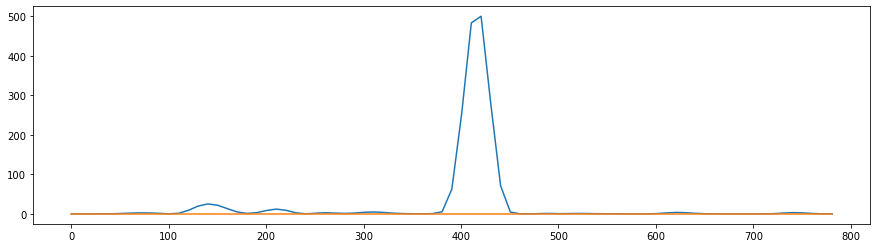

In [35]:
x = np.linspace(0, sr/2, 1102)
cap = int(800/(sr/2/1102))
time_idx = int(len(specgram)/2)
time_idx = 11393
scale = 500 / 0.008233989
maxamptitude = max(np.abs(specgram[:cap, time_idx]))
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.plot(x[:cap], np.abs(specgram[:cap, time_idx])*scale)
time_idx = 3501
maxamptitude = max(np.abs(specgram[:cap, time_idx]))
ax.plot(x[:cap], np.abs(specgram[:cap, time_idx]))
plt.show()

In [7]:
print(max(y))

0.6307528


In [22]:
maxx = 0
count = 0
idx = 0
print(len(specgram.transpose()))
for x in specgram.transpose():
    if max(x) > maxx:
        maxx = max(x)
        idx = count
    count+=1
        
print(maxx, idx)

14087
0.008233989 11393


In [34]:
scale = 500 / 0.008233989

60723.909152659784

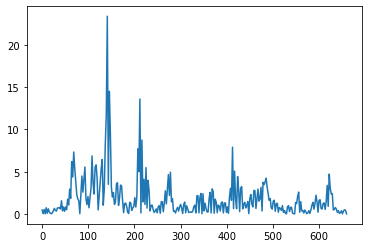

In [358]:
time_idx=int((3500/specgram.shape[1])/len(times))
plt.plot(freqs[:300], spec[:300, time_idx])

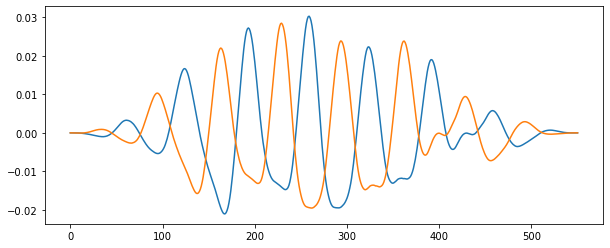

In [414]:
sample_rate = sr
window_ms = 25
n = int(0.001 * sample_rate * window_ms)
num = 100
xf = range(n)
weighting = np.hanning(n)[:, None]
yf = y[num*n:(num+1)*n]*weighting[:, 0]
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.plot(xf, yf)
yf = y[num*n+30:(num+1)*n+30]*weighting[:, 0]
ax.plot(xf, yf)
plt.show()

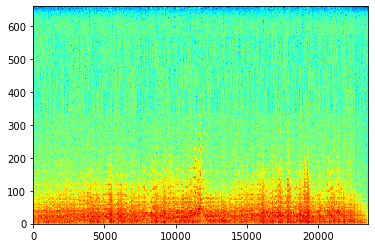

In [363]:
img = plt.imshow(specgram, origin='lower', cmap='jet', interpolation='nearest', aspect='auto')
plt.show()

In [322]:
y2, sr2 = librosa.core.load('../files/Beethoven_-_Piano_Sonata_No._14_in_C-Sharp_Minor_Moonlight__I.mp3')

C:\Users\tma8\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [364]:
y3, sr3 = librosa.core.load(librosa.ex('trumpet'))

In [365]:
specgram3 = spectrogram(y3, sr3)

661


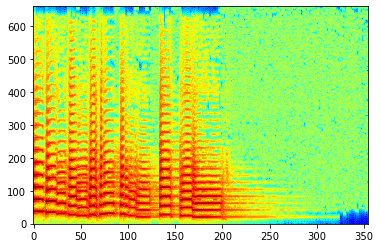

In [366]:
img = plt.imshow(specgram3, origin='lower', cmap='jet', interpolation='nearest', aspect='auto')
plt.show()

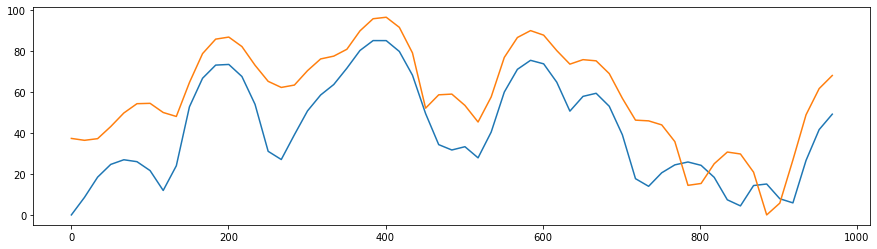

In [367]:
x = np.linspace(0, sr/2, 661)
cap = int(1000/(sr/2/661))
time_idx = 3500
maxamptitude = max(np.abs(specgram[:cap, time_idx]))
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.plot(x[:cap], maxamptitude - np.abs(specgram[:cap, time_idx]))
time_idx = 3501
maxamptitude = max(np.abs(specgram[:cap, time_idx]))
ax.plot(x[:cap], maxamptitude - np.abs(specgram[:cap, time_idx]))
plt.show()

In [323]:
specgram2 = spectrogram(y2, sr2)

<ipython-input-317-5d3cfd478cbc>:34: RuntimeWarning: divide by zero encountered in log10
  specgram = 20*np.log10(specgram)


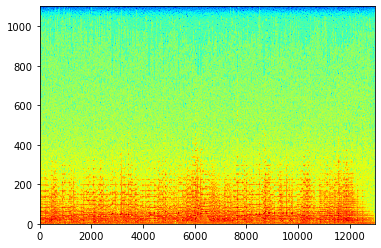

In [325]:
img = plt.imshow(specgram2, origin='lower', cmap='jet', interpolation='nearest', aspect='auto')
plt.show()

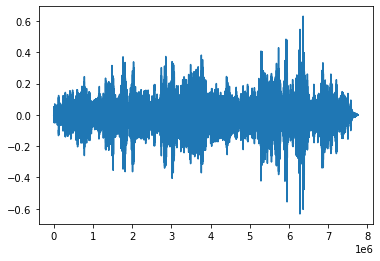

In [86]:
plt.plot(range(len(y)), y)

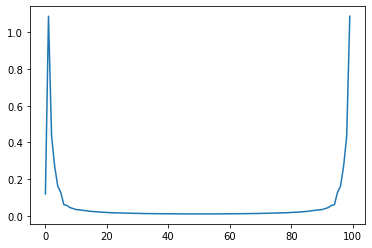

In [95]:
n = 100
plt.plot(range(n), np.abs(np.fft.fft(y[1000*n:1001*n])))

In [93]:
50//2

25

In [85]:
np.abs(np.fft.fft(y))[int(len(y)/2)]

0.0012362275652641093

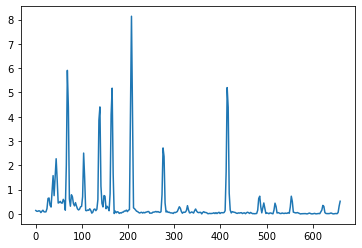

In [228]:
time_idx= int((3500/len())/len(times))
plt.plot(freqs[:300], spec[:300, time_idx])

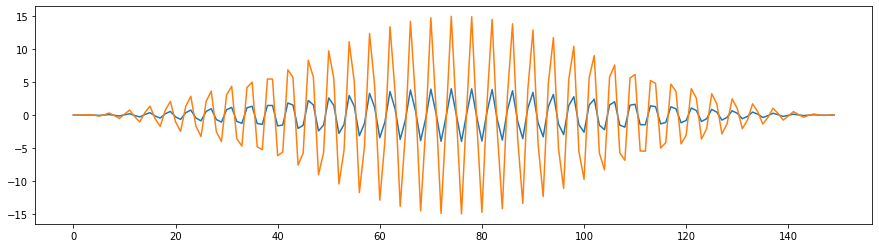

In [73]:
f = 112
A = 4
x = np.arange(150)
yy = 1/2-1/2*np.cos(2*np.pi*x/len(x))
sin_y = A*np.sin(2 * np.pi * f * x / len(x))
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.plot(x,yy*sin_y)
A = 15
sin_y = A*np.sin(2 * np.pi * f * x / len(x))
ax.plot(x,yy*sin_y)
plt.show()

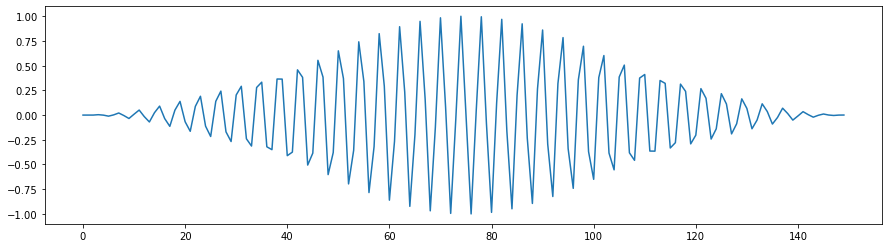

In [76]:
fig, ax = plt.subplots(1, figsize=(15, 4))
plt_y = sin_y*yy
ymax = max(plt_y)
plt_y = plt_y / ymax
ax.plot(x, plt_y)
plt.show()

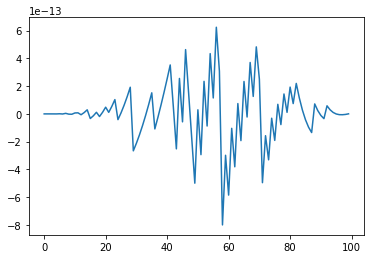

In [40]:
f = 100
A = 15
x = np.arange(100)
y = 1/2-1/2*np.cos(2*np.pi*x/len(x))
sin_y = A*np.sin(2 * np.pi * f * x / len(x))
plt.plot(x,sin_y*y)

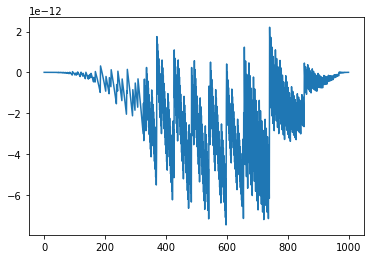

In [53]:
f = 1000
A = 10
x = np.arange(1000)
y = 1/2-1/2*np.cos(2*np.pi*x/len(x))
sin_y = A*np.sin(2 * np.pi * f * x / len(x))
plt.plot(x,sin_y*y)

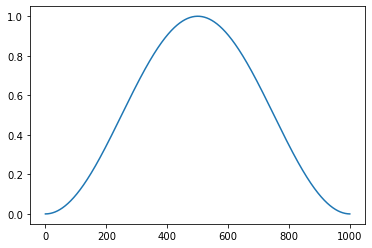

In [58]:
y

array([0.00000000e+00, 9.86957193e-06, 3.94778981e-05, 8.88238096e-05,
       1.57905358e-04, 2.46719817e-04, 3.55263680e-04, 4.83532661e-04,
       6.31521697e-04, 7.99224946e-04, 9.86635786e-04, 1.19374682e-03,
       1.42054987e-03, 1.66703598e-03, 1.93319543e-03, 2.21901770e-03,
       2.52449151e-03, 2.84960480e-03, 3.19434474e-03, 3.55869772e-03,
       3.94264934e-03, 4.34618447e-03, 4.76928715e-03, 5.21194070e-03,
       5.67412763e-03, 6.15582970e-03, 6.65702790e-03, 7.17770243e-03,
       7.71783274e-03, 8.27739750e-03, 8.85637464e-03, 9.45474128e-03,
       1.00724738e-02, 1.07095478e-02, 1.13659382e-02, 1.20416190e-02,
       1.27365636e-02, 1.34507445e-02, 1.41841335e-02, 1.49367018e-02,
       1.57084194e-02, 1.64992561e-02, 1.73091806e-02, 1.81381609e-02,
       1.89861642e-02, 1.98531572e-02, 2.07391055e-02, 2.16439742e-02,
       2.25677276e-02, 2.35103292e-02, 2.44717419e-02, 2.54519275e-02,
       2.64508475e-02, 2.74684624e-02, 2.85047321e-02, 2.95596155e-02,
      